In [5]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

functions = [
    lambda x: x - np.sin(x) - 0.25,
    lambda x: x**3 - np.exp(x) + 1,
    lambda x: np.sqrt(x) + np.cos(x),
    lambda x: x**2 + 1 - np.arccos(x),
    lambda x: np.log10(x) + 7/(2*x+6),
]

def get_values(x, func):
    y = []
    for x_ in x:
        y.append(func(x_))
    return y

def get_equal_range(a, b, n):
    range_ = []
    adder = (b-a)/(n-1)
    for i in range(n):
        range_.append(a+adder*i)
    return range_

def get_optimal_range(a, b, n):
    range_ = []
    for i in range(n):
        range_.append(((b-a)*np.cos((2*i+1)*np.pi/(2*n))+(b+a))/2)
    return range_[::-1]

class LagrangePolynomial:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def calculate(self, x):
        res = 0
        for i in range(len(self.y)):
            y_ = self.y[i]
            x_ = self.x[i]
            l = 1
            for j in chain(range(0,i), range(i+1,len(self.x))):
                l = l*(x - self.x[j])/(x_ - self.x[j])
            res += y_*l
        return res
    def calculate_range(self, x):
        y = []
        for x_ in x:
            y.append(self.calculate(x_))
        return y

def test(func, a, b, start_n, end_n, plot_n):
    for n in range(start_n, end_n+1):
        fig, axs = plt.subplots(1, 2, figsize=(6, 3))
        plot_range = get_equal_range(a, b, plot_n)
        plot_values = get_values(plot_range, func)
        axs[0].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[1].plot(plot_range, plot_values, linewidth=2.0, color='g')

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_pol = LagrangePolynomial(eq_range, eq_values)
        eq_pol_values = eq_pol.calculate_range(plot_range)
        axs[0].plot(plot_range, eq_pol_values, linewidth=2.0, color='r')
        axs[0].set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_pol_values)), 2)}')
        axs[0].grid(True)

        opt_range = get_optimal_range(a, b, n)
        opt_values = get_values(opt_range, func)
        opt_pol = LagrangePolynomial(opt_range, opt_values)
        opt_pol_values = opt_pol.calculate_range(plot_range)
        axs[1].plot(plot_range, opt_pol_values, linewidth=2.0, color='r')
        axs[1].set_title(f'opt, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(opt_pol_values)), 2)}')
        axs[1].grid(True)

First test:


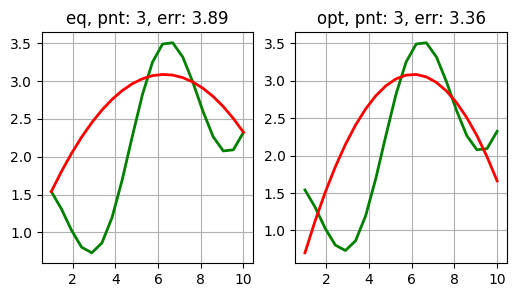

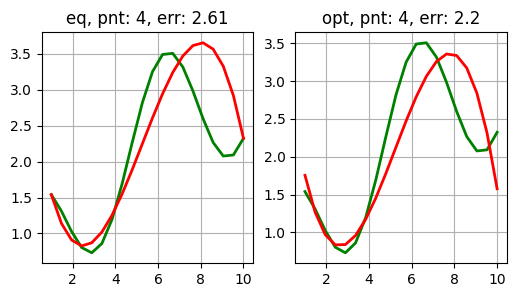

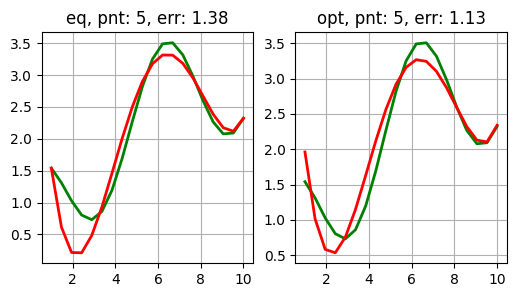

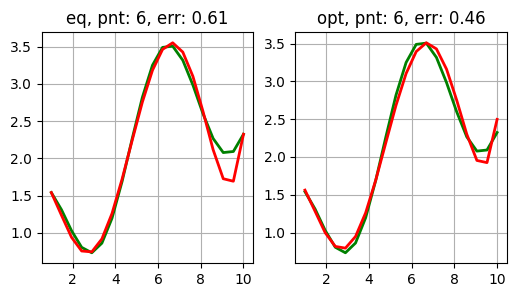

In [6]:
test_func = functions[2]
test_a = 1
test_b = 10
test_start_n = 3
test_end_n = 6
test_plot_n = 20
print('First test:')
test(test_func, test_a, test_b, test_start_n, test_end_n, test_plot_n)

Second test:


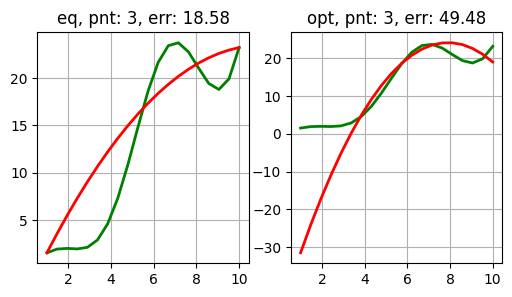

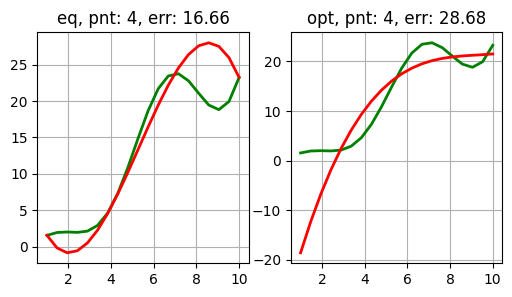

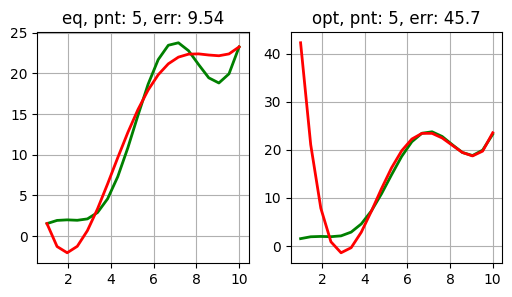

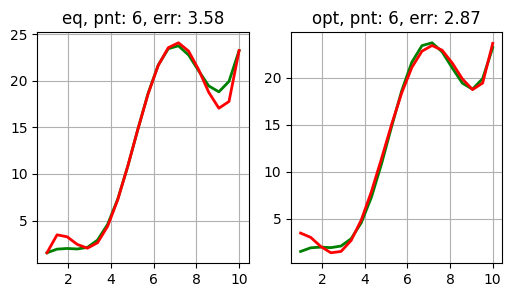

In [7]:
print('Second test:')
upd_test_func = lambda x: np.linalg.norm(x)*test_func(x)
test(upd_test_func, test_a, test_b, test_start_n, test_end_n, test_plot_n)